## SVM con *kernel*

Precisión del SVM con kernel RBF: 94.87%


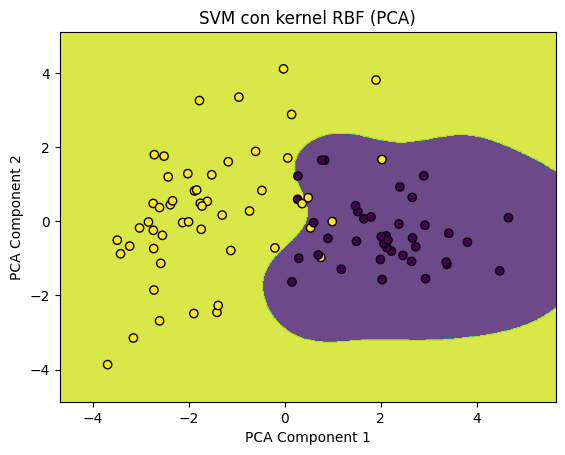

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Wine
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Filtrar el conjunto de datos para solo dos clases (0 y 1)
X = X[y != 2]
y = y[y != 2]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el SVM con el kernel RBF
svm = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = svm.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del SVM con kernel RBF: {accuracy * 100:.2f}%")

# Reducir la dimensionalidad para visualización
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar el SVM con los datos reducidos
svm_pca = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm_pca.fit(X_train_pca, y_train)

# Visualizar los datos y la frontera de decisión
def plot_decision_boundary(model, X, y, title):
    h = .02  # paso de la cuadrícula
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(title)
    plt.show()

# Visualizar la frontera de decisión en el espacio PCA
plot_decision_boundary(svm_pca, X_train_pca, y_train, 'SVM con kernel RBF (PCA)')



# SVM con *kernel*

Precisión del SVM lineal: 100.00%


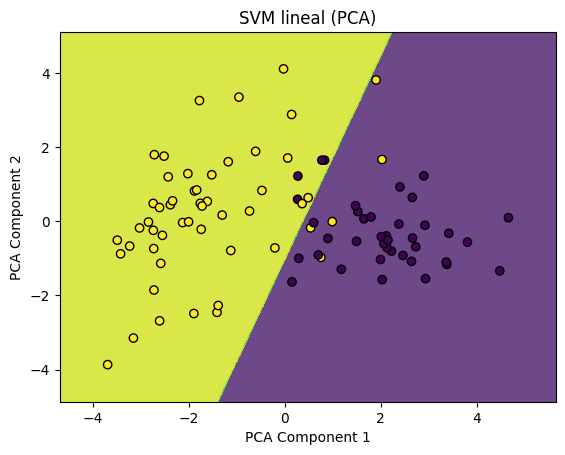

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Wine
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Filtrar el conjunto de datos para solo dos clases (0 y 1)
X = X[y != 2]
y = y[y != 2]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el SVM lineal
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred = svm_linear.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del SVM lineal: {accuracy * 100:.2f}%")

# Reducir la dimensionalidad para visualización
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar el SVM lineal con los datos reducidos
svm_linear_pca = SVC(kernel='linear', C=1.0)
svm_linear_pca.fit(X_train_pca, y_train)

# Visualizar los datos y la frontera de decisión
def plot_decision_boundary(model, X, y, title):
    h = .02  # paso de la cuadrícula
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title(title)
    plt.show()

# Visualizar la frontera de decisión en el espacio PCA
plot_decision_boundary(svm_linear_pca, X_train_pca, y_train, 'SVM lineal (PCA)')



Error cuadrático medio del SVM con kernel RBF: 1.13


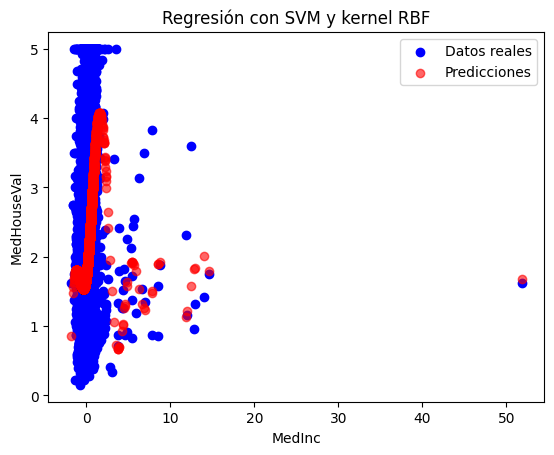

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos California Housing
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Utilizar solo una característica para la visualización
X = X[:, np.newaxis, 2]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el SVM con kernel RBF
svm_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_rbf.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_rbf = svm_rbf.predict(X_test)

# Calcular el error cuadrático medio
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
print(f"Error cuadrático medio del SVM con kernel RBF: {mse_rbf:.2f}")

# Visualizar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred_rbf, color='red', label='Predicciones', alpha=0.6)
plt.title('Regresión con SVM y kernel RBF')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.legend()
plt.show()


# Regresión sin *kernel*

Error cuadrático medio del SVM lineal: 1.36


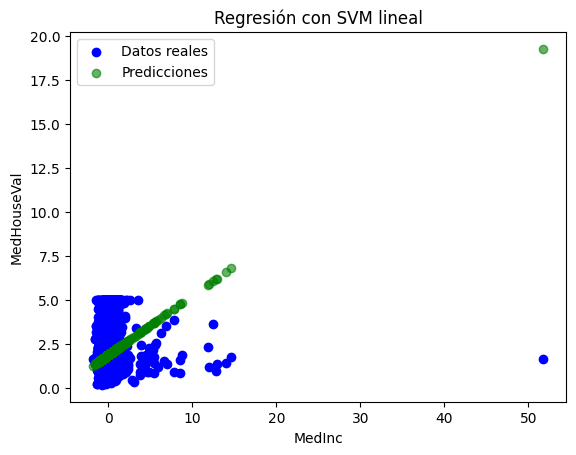

In [4]:
# Entrenar el SVM lineal
svm_linear = SVR(kernel='linear', C=100, epsilon=0.1)
svm_linear.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_linear = svm_linear.predict(X_test)

# Calcular el error cuadrático medio
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Error cuadrático medio del SVM lineal: {mse_linear:.2f}")

# Visualizar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.scatter(X_test, y_pred_linear, color='green', label='Predicciones', alpha=0.6)
plt.title('Regresión con SVM lineal')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.legend()
plt.show()
